In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.datasets import fetch_openml


In [4]:
boston=fetch_openml(name='boston')

C:\python 3.10\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [5]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)
t=pd.DataFrame(boston.target)

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
t.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

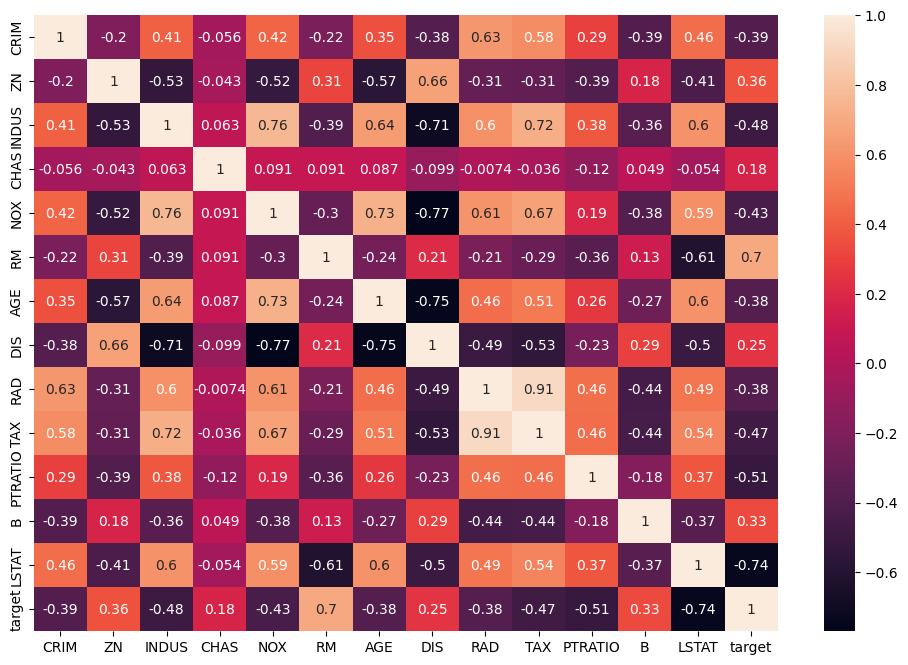

In [16]:
data["target"]=t
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
train_df= data[['LSTAT', 'RM', 'TAX','INDUS','target']]



In [18]:
x=train_df[['LSTAT', 'RM', 'TAX','INDUS']]
y=train_df["target"]

In [19]:
s=StandardScaler()
x=s.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)
y_pred

array([25.57265128, 31.26680584, 16.65308828, 26.20275355, 18.29606573,
       23.11123029, 17.99181737, 16.18198008, 20.40826746, 20.08265462,
       19.10529746, 18.92446933, -2.9590114 , 22.63508145, 20.45949491,
       25.34777074, 20.91916281,  2.69494718, 37.28255181, 17.17373046,
       26.93805361, 27.62660071, 14.21973017, 27.24702957, 17.53926627,
       12.87566166, 22.44670318, 19.9194385 , 19.17311281, 18.89376423,
       17.58653496, 27.10210652, 26.22321934, 17.01969565, 14.33258137,
       18.37090626, 33.57961283, 22.8222017 , 21.24337869, 26.07558081,
       12.61036385, 29.36566687, 38.74885352, 18.37995285, 25.88068019,
       15.07980749, 16.56391377, 27.51498088, 18.11611374, 28.59653395,
       21.12654444, 31.88266365, 18.8512054 , 28.07910596, 35.16350686,
       22.17799506, 18.24031021, 31.89437708, 25.58544747, 15.51011377,
       27.49311653, 33.03813156, 29.4620882 , 18.95649141, 27.21116031,
       12.38162663, 19.36652506, 26.46549965, 29.55420695, 15.49

In [22]:
mean_squared_error(y_pred,y_test)

31.624072970053806

In [23]:
mean_absolute_error(y_pred,y_test)

3.7963157774906144

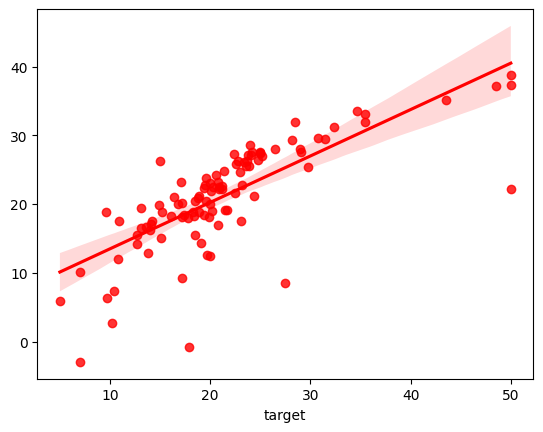

In [29]:
sns.regplot(x=y_test,y= y_pred, color='red')
plt.show()